# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [4]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [5]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [6]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

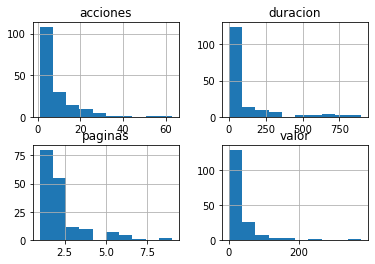

In [7]:
dataframe.drop(['clase'],1).hist()
plt.show()

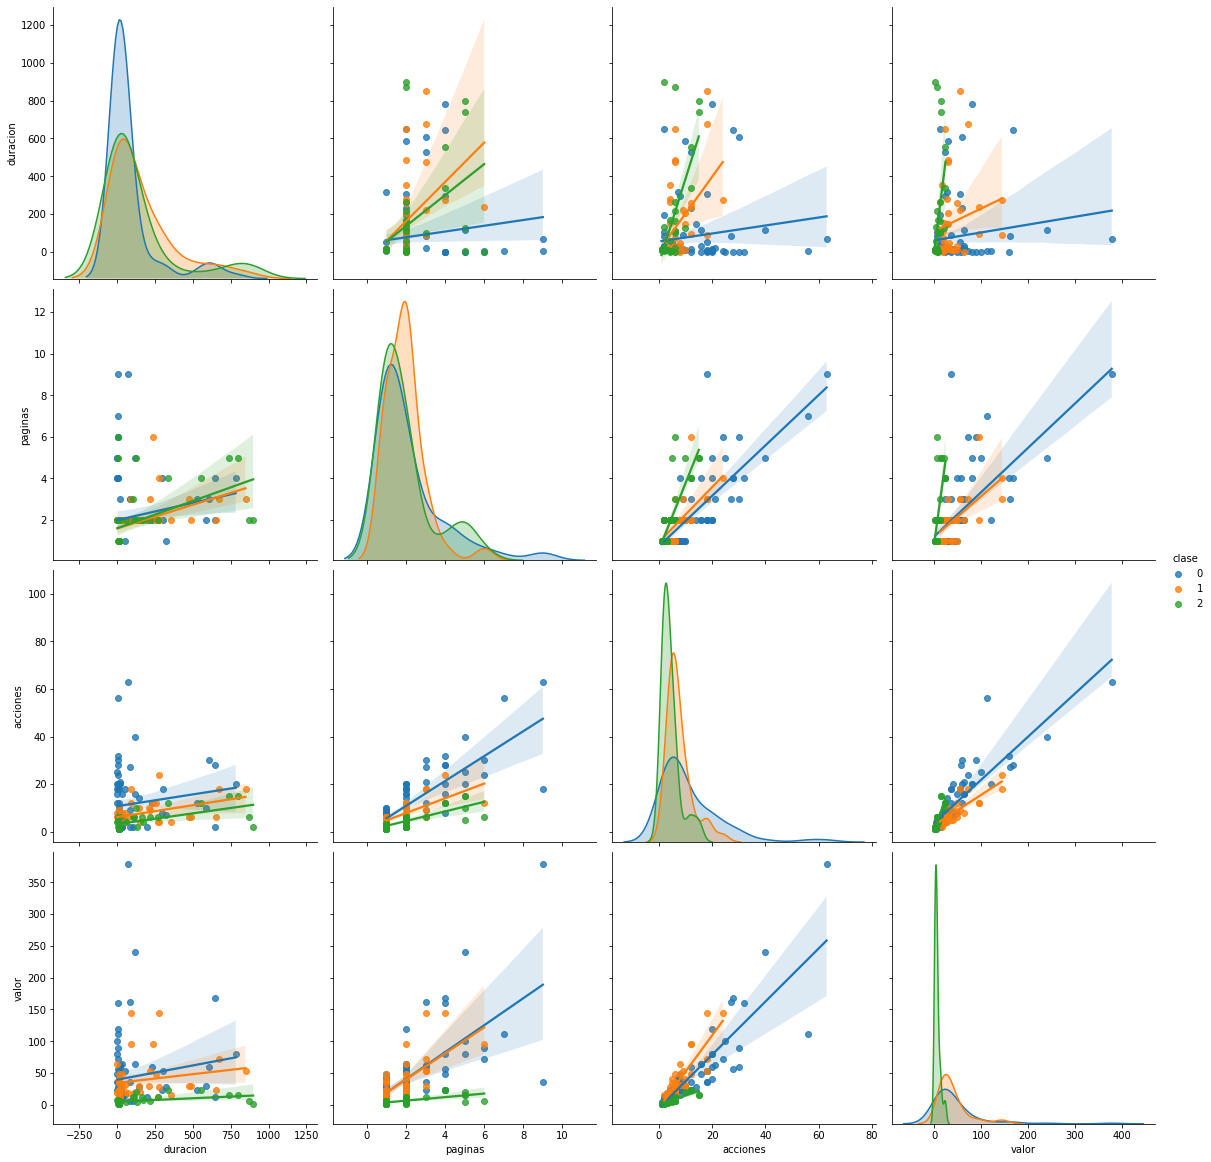

In [6]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal

## Creamos el modelo

In [8]:
X = np.array(dataframe.drop(['clase'], 1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [9]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [10]:
y.shape

(170,)

In [11]:
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 1
 0 1 1 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
model.score(X,y)

0.7823529411764706

# Adicional: Validación del Modelo

In [11]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [17]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.728571 (0.094186)


In [18]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8529411764705882


## Reporte de Resultados

In [19]:
print(confusion_matrix(Y_test, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [20]:
Y_test

array([1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2])

In [21]:
Y_test.shape

(34,)

In [26]:
acierto = accuracy_score(Y_test, predictions)
error = 1 - acierto
print('Acierto', round(acierto*100, 2))
print('El error es de: ', round(error*100, 2), '%')

Acierto 85.29
El error es de:  14.71 %


# Clasificación de nuevos registros

In [27]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2])

In [28]:
X_new

,duracion,paginas,acciones,valor
0,10,3,5,9
